In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
!unzip /content/drive/MyDrive/AprendizajeAutomatico/twitter.zip

Archive:  /content/drive/MyDrive/AprendizajeAutomatico/twitter.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [4]:
#Importamos los datos
data = pd.read_csv('/content/Tweets.csv')

In [5]:
#Vemos los datos
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#Vemos información sobre nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<Axes: xlabel='airline_sentiment', ylabel='count'>

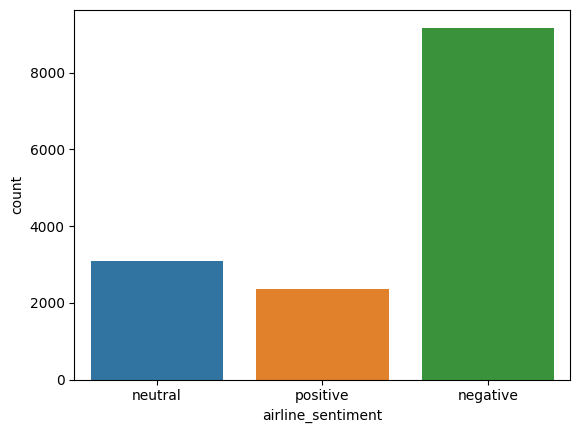

In [7]:
sns.countplot(x = "airline_sentiment", data = data)

In [8]:
#Lo primero, eliminemos las columnas que no necesitamos

elim_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

data_limpio = data.drop(elim_col, axis = 1)

In [9]:
data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [10]:
def sentiment(x):
    if x == 'positive':
        return 1
    elif x == 'negative':
        return -1
    else:
        return 0

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
# Como este conjunto de datos se obtiene de Twitter, tiene muchas etiquetas de personas en los tweets, los eliminaremos
tags = r"@\w*"

def preprocess_text(sentence, stem = False):

    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:

        if word not in stopwords:

            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize(" ".join(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ahora vamos a imprimir una frase para ver que funciona el método que hicimos anteriormente.

In [12]:
print(f"Orignal Text : {data_limpio.text[11]}")
print()
print(f"Preprocessed Text : {preprocess_text(data_limpio.text[11])}")

Orignal Text : @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D

Preprocessed Text : ['i', 'lt', '3', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography', 'd']


In [13]:
#Lo visualizamos mejor
data_limpio.text = data_limpio.text.map(preprocess_text)
data_limpio.head()

,airline_sentiment,text
0,neutral,"[what, said]"
1,positive,"[plus, you, ve, added, commercials, to, the, e..."
2,neutral,"[i, didn, t, today, must, mean, i, need, to, t..."
3,negative,"[it, s, really, aggressive, to, blast, obnoxio..."
4,negative,"[and, it, s, a, really, big, bad, thing, about..."


Vamos a comprobar que nuestras columnas no tienen elementos NaN, que podrían empeorar posteriormente nuestro modelo de entrenamiento.

In [14]:
data_limpio['airline_sentiment'].isna().sum()

0

In [15]:
data_limpio['text'].isna().sum()

0

In [16]:
import plotly.express as px
fig = px.pie(data_limpio, names='airline_sentiment', title ='Gráfico circular de diferentes sentimientos de los tweets')
fig.show()

### Bag of words

Ventajas de esta codificación de bolsa de palabras (BoW):

- Al igual que la codificación one-hot, BoW es bastante sencillo de entender e implementar.

- Con esta representación, los documentos que tienen las mismas palabras tendrán sus representaciones vectoriales más cercanas entre sí en el espacio euclidiano en comparación con documentos con palabras completamente diferentes.

- Tenemos una codificación de longitud fija para cualquier oración de longitud arbitraria.

Desventajas de esta codificación de bolsa de palabras (BoW):

- El tamaño del vector aumenta con el tamaño del vocabulario, ya que en nuestro caso tiene 14238 dimensiones. Por tanto, la escasez sigue siendo un problema. Una forma de controlarlo es limitando el vocabulario a n número de palabras más frecuentes.

- No capta la similitud entre diferentes palabras que significan lo mismo. Digamos que tenemos tres documentos: “caminar”, “caminar” y “caminar”. Los vectores Bow de los tres documentos estarán igualmente separados.

- Esta representación no tiene ninguna forma de manejar palabras fuera del vocabulario (OOV) (es decir, palabras nuevas que no se vieron en el corpus que se utilizó para construir el vectorizador).

- Como su nombre lo indica, es una “bolsa” de palabras; en esta representación se pierde la información del orden de las palabras.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

sample_bow = CountVectorizer()

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)

print(f"Vocabulary mapping for given sample corpus : \n {sample_bow.vocabulary_}")
print("\nBag of word Representation of sentence 'the cat cat sat in the hat'")
print(get_bow_representation(["the cat cat sat in the hat"]).toarray())

Vocabulary mapping for given sample corpus : 
 {'the': 4, 'cat': 0, 'sat': 3, 'in': 2, 'hat': 1, 'with': 5}

Bag of word Representation of sentence 'the cat cat sat in the hat'
[[2 1 1 1 2 0]]


### TF-IDF

TF-IDF es una representación comúnmente utilizada en escenarios de aplicaciones como la recuperación de información y la clasificación de texto. Sin embargo, sufre la maldición de la alta dimensionalidad.

Estas son las principales ventajas y desventajas de la representación TF-IDF:

- Su implementación no es tan fácil en comparación otras técnicas. Tenemos una codificación de longitud fija para cualquier oración de longitud arbitraria. Los vectores de características son representaciones de alta dimensión. La dimensionalidad aumenta con el tamaño del vocabulario. Captó un poco de la semántica de la oración.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tfidf_rep = tfidf.fit_transform(sample_corpus)
print(f"IDF Values for sample corpus : {tfidf.idf_}")


print("TF-IDF Representation for sentence 'the cat sat in the hat' :")
print(tfidf.transform(["the cat sat in the hat"]).toarray())

IDF Values for sample corpus : [1.         1.28768207 1.69314718 1.28768207 1.         1.69314718]
TF-IDF Representation for sentence 'the cat sat in the hat' :
[[0.29903422 0.385061   0.50630894 0.385061   0.59806843 0.        ]]


Aplicado a nuestro ejercicio, podríamos hacer lo siguiente:

In [19]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(data_limpio['text'], data_limpio['airline_sentiment'], test_size=0.2, random_state=42)

# Unir las listas de texto en un solo texto para cada conjunto
train_text = [" ".join(text) for text in train_data]
test_text = [" ".join(text) for text in test_data]

# Utilizar TF-IDF para representar el texto
tfidf_vectorizer = TfidfVectorizer()
train_tfidf = tfidf_vectorizer.fit_transform(train_text)
test_tfidf = tfidf_vectorizer.transform(test_text)

### One-Hot Encoding

In [20]:
#Vocabulario de palabras presentes en el conjunto de datos
data_vocab = []
for text in data_limpio.text:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [21]:
#Función para devolver una representación única del texto pasado
def get_onehot_representation(text, vocab = data_vocab):
    onehot_encoded = []
    for word in text:
        temp = [0]*len(vocab)
        temp[vocab.index(word)-1] = 1
        onehot_encoded.append(temp)
    return onehot_encoded

In [22]:
print(f'Length of Vocabulary : {len(data_vocab)}')
print(f'Sample of Vocabulary : {data_vocab[302 : 312]}')

Length of Vocabulary : 14276
Sample of Vocabulary : ['number', 'awaiting', 'return', 'phone', 'call', 'prefer', 'use', 'self', 'service', 'option']


In [23]:
sample_one_hot_rep = get_onehot_representation(data_limpio.text[7], data_vocab)
print(f"Shapes of a single sentence : {np.array(sample_one_hot_rep).shape}")

Shapes of a single sentence : (15, 14276)


La codificación one-hot es intuitiva de entender y sencilla de implementar. Sin embargo, tiene muchas desventajas que se enumeran a continuación:

- El tamaño de un vector one-hot es directamente proporcional al tamaño del vocabulario y, si consideramos el tamaño de un vocabulario del mundo real, puede ser de millones, por lo que no podemos representar una sola palabra con un vector de un millón de dimensiones.

- La representación one-hot no proporciona una representación de longitud fija para el texto, es decir, la oración con 32 palabras y 40 palabras tiene una representación de longitud variable. Pero para la mayoría de los algoritmos de aprendizaje, necesitamos que los vectores de características tengan la misma longitud.

- La representación One-Hot le da a cada palabra el mismo peso, ya sea que esa palabra sea importante para la tarea o no.

- La representación One-Hot no representa el significado de la palabra de manera numérica adecuada como lo hacen los vectores de incrustación.

### Word2vec Word Embeddings

In [24]:
!pip install kaggle

In [32]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [33]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle datasets download -d adarshsng/googlenewsvectors

100% 1.63G/1.64G [00:18<00:00, 124MB/s]
100% 1.64G/1.64G [00:18<00:00, 95.2MB/s]


In [35]:
!unzip googlenewsvectors.zip

Archive:  googlenewsvectors.zip
  inflating: GoogleNews-vectors-negative300.bin  


In [36]:
!pip install gensim

In [38]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin', binary=True )

word_vectors = model

### Glove Word Embeddings

In [39]:
Glove_path = '/content/drive/MyDrive/AprendizajeAutomatico/glove.6B.100d.txt'
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = 'glove.6B.100d.txt'
glove2word2vec(Glove_path, word2vec_output_file)

<ipython-input-39-5c75dff46901>:4: DeprecationWarning:

Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).



(400000, 100)

In [40]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './glove.6B.100d.txt'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [41]:
print("Most similar words to word 'human' : ")
Glove_model.most_similar('human')

Most similar words to word 'human' : 


[('animal', 0.7462460398674011),
 ('rights', 0.7322573661804199),
 ('humans', 0.6607711911201477),
 ('animals', 0.6567643284797668),
 ('body', 0.6552972197532654),
 ('nature', 0.6483666896820068),
 ('beings', 0.6467736959457397),
 ('organization', 0.6319881081581116),
 ('scientific', 0.630841076374054),
 ('common', 0.6211239099502563)]

In [42]:
print("Glove Word Embeddings of word 'human' ")
Glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 3.3864e-01,  5.9663e-01,  5.3322e-01,  3.1404e-01,  1.5321e-01,
        3.1749e-01, -4.2940e-01, -2.9150e-01, -2.1047e-03, -3.9309e-01,
       -8.5441e-01, -8.0708e-02,  1.2118e+00,  6.9316e-02,  8.0613e-03,
        8.7888e-01,  3.1908e-02,  5.8655e-01, -5.4892e-01, -7.8468e-03,
        1.7327e-01, -2.6693e-01,  4.2802e-01,  6.6123e-02,  5.1847e-01,
        7.7226e-01,  2.0608e-01, -4.5836e-01,  3.5485e-01,  7.1547e-01,
        6.0855e-01,  2.0254e-01, -4.8756e-01,  5.7974e-01,  8.6728e-02,
       -5.1852e-01, -3.7274e-01,  1.0014e+00, -2.9259e-01,  3.2290e-01,
       -9.7563e-01, -2.2288e-01, -2.3335e-01, -2.6891e-01,  1.4612e-01,
        1.2004e-01, -2.0402e-01, -9.4647e-02, -1.5402e+00, -5.9510e-02,
        1.0887e+00, -2.4998e-01, -2.5808e-01,  1.2798e+00, -1.2849e-01,
       -1.4511e+00, -2.4686e-01, -9.5046e-02,  1.7425e+00,  1.1977e-01,
       -1.9206e-01,  4.4368e-01, -1.6453e-01, -7.6663e-01,  1.1100e+00,
        4.6748e-01, -2.4673e-02,  4.7179e-03,  6.9761e-01, -2.29

Ventajas de Glove:

- El objetivo de Glove es muy sencillo, es decir, hacer cumplir los vectores de palabras para capturar relaciones sublineales en el espacio vectorial. Por lo tanto, demuestra funcionar mejor que Word2vec en las tareas de analogía de palabras. Glove agrega un significado más práctico a los vectores de palabras al considerar las relaciones entre pares de palabras y pares de palabras en lugar de palabra y palabra. El guante otorga menor peso a los pares de palabras muy frecuentes para evitar que palabras vacías sin sentido como "el", "an" no dominen el progreso del entrenamiento.

Desventajas de Glove:

- El modelo se entrena en la matriz de coocurrencia de palabras, lo que requiere mucha memoria para su almacenamiento. Especialmente, si cambia los hiperparámetros relacionados con la matriz de coocurrencia, tendrá que reconstruir la matriz nuevamente, lo cual lleva mucho tiempo.

Tanto Word2vec como Glove no resuelven problemas como:

- Cómo aprender la representación de palabras fuera de vocabulario. Cómo separar algunos pares de palabras opuestas. Por ejemplo, "bueno" y "malo" suelen estar ubicados muy cerca uno del otro en el espacio vectorial, lo que puede limitar el rendimiento de los vectores de palabras en tareas de PNL como el análisis de sentimientos. El contenido de esta celda está tomado de Quora.

- A pesar de la facilidad de usar poderosas incrustaciones de palabras como Word2vec o cualquier incrustación de palabras similar para extraer características de los textos, todavía no tenemos una buena manera de manejar palabras OOV.

### Tokenizing & Padding

In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len=500

def tokenize_pad_sequences(text):
    '''
    Esta función convierte el texto de entrada en secuencias de números
    enteros y luego rellena cada secuencia con la misma longitud
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data_limpio['text'][0])
X, tokenizer = tokenize_pad_sequences(data_limpio['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ['what', 'said']
After Tokenization & Padding 
 [ 47 222   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0

### Saving tokenized data

In [60]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Train & Test Split

In [61]:
y = pd.get_dummies(data_limpio['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (11712, 500) (11712, 3)
Test Set -> (2928, 500) (2928, 3)


In [62]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Función para calcular la puntuación f1 '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Bidirectional LSTM

In [80]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 10000
embedding_size = 100

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 bidirectional_6 (Bidirecti  (None, 32)                14976     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1015075 (3.87 MB)
Trainable params: 1015075 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [83]:
history = model.fit(X_train, y_train, validation_split=0.3, batch_size=200, epochs=10)

Epoch 1/10
41/41 [==============================] - 70s 2s/step - loss: 0.9451 - acc: 0.6051 - val_loss: 0.8409 - val_acc: 0.6181
Epoch 2/10
41/41 [==============================] - 53s 1s/step - loss: 0.7311 - acc: 0.6831 - val_loss: 0.6829 - val_acc: 0.7006
Epoch 3/10
41/41 [==============================] - 53s 1s/step - loss: 0.5742 - acc: 0.7804 - val_loss: 0.6326 - val_acc: 0.7547
Epoch 4/10
41/41 [==============================] - 53s 1s/step - loss: 0.5413 - acc: 0.8217 - val_loss: 0.5965 - val_acc: 0.7721
Epoch 5/10
41/41 [==============================] - 52s 1s/step - loss: 0.4129 - acc: 0.8595 - val_loss: 0.6080 - val_acc: 0.7746
Epoch 6/10
41/41 [==============================] - 48s 1s/step - loss: 0.3511 - acc: 0.8928 - val_loss: 0.6125 - val_acc: 0.7795
Epoch 7/10
41/41 [==============================] - 55s 1s/step - loss: 0.2997 - acc: 0.9122 - val_loss: 0.6265 - val_acc: 0.7729
Epoch 8/10
41/41 [==============================] - 47s 1s/step - loss: 0.2604 - acc: 0.92

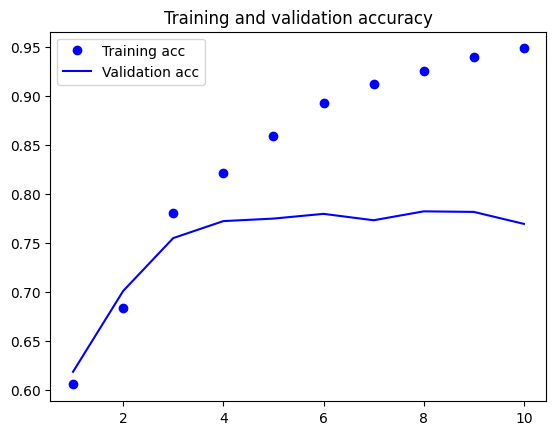

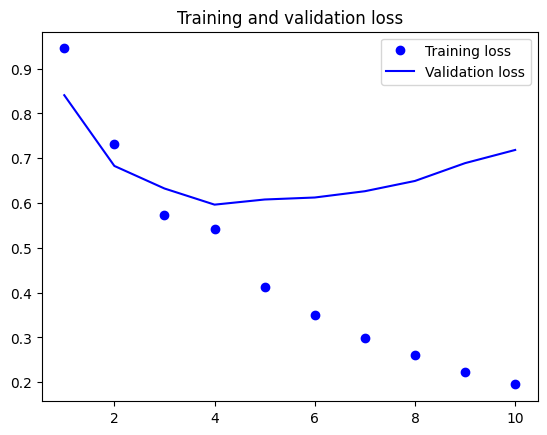

In [84]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [85]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 11s 115ms/step - loss: 0.7286 - acc: 0.7698


[0.7286210060119629, 0.7698087692260742]